# Homework 6
You need to classify digits with SVM models in this homework. Use PCA to reduce data dimensionality (80% information remain). Compare performance of linear, radial, and polynomial kernals. Tune kernal parameters using Randomsearch method.

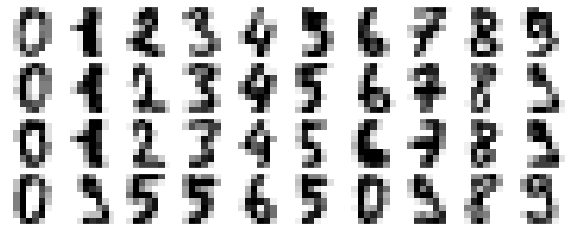

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

In [4]:
# data labels
images_and_labels = list(zip(digits.images, digits.target))
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [5]:
# Principal Component Analysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(data)

# 80% of variance
pca = PCA(n_components = 0.80, whiten = True)

X_pca = pca.fit_transform(X)
print("Original number of features:", X.shape)
print("Reduced number of features:", X_pca.shape)
print(digits['data'].shape)


Original number of features: (1797, 64)
Reduced number of features: (1797, 21)
(1797, 64)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca,digits['target'], test_size = 0.3, random_state = 0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1257, 21) (1257,)
(540, 21) (540,)


In [7]:
#Comparing performance of linear, polynomial and radial kernels
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [8]:
#Performance tuning of Linear kernel using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

model = svm.SVC(kernel='linear')

hyper_params = {'C': [0.1, 1, 10, 100]
                }


model_cv = RandomizedSearchCV(
            estimator = model,
            param_distributions = hyper_params,
            cv = 10,
            n_iter = 50
            )


model_cv.fit(X_train, y_train)
best_hyperparam = model_cv.best_params_
print(best_hyperparam)

best_model = svm.SVC(C=best_hyperparam['C'], kernel = 'linear')
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print('Accuracy score:', metrics.accuracy_score(y_test, y_pred))

/home/savitha/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=50. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'C': 0.1}
Accuracy score: 0.9666666666666667


In [10]:
#Performance tuning of Polynomial kernel using RandomizedSearchCV

model = svm.SVC(kernel='poly')

hyper_params = {
                'degree': [2, 3, 4, 5, 6, 7]
                }             


model_cv = RandomizedSearchCV(
            estimator = model,
            param_distributions = hyper_params,
            cv = 10,
            n_iter = 50
            )


model_cv.fit(X_train, y_train)
best_hyperparam = model_cv.best_params_
print(best_hyperparam)

best_model = svm.SVC(kernel = 'poly', degree = best_hyperparam['degree'])
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print('Accuracy score:', metrics.accuracy_score(y_test, y_pred))


/home/savitha/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 6 is smaller than n_iter=50. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'degree': 3}
Accuracy score: 0.9611111111111111


In [12]:
#Performance tuning of Radial kernel using RandomizedSearchCV

model = svm.SVC(kernel='rbf')

hyper_params = {
                'gamma': [0.1, 0.01, 0.001, 0.0001, 1]
               }            


model_cv = RandomizedSearchCV(
            estimator = model,
            param_distributions = hyper_params,
            cv = 10,
            n_iter = 50
            )


model_cv.fit(X_train, y_train)
best_hyperparam = model_cv.best_params_
print(best_hyperparam)

best_model = svm.SVC(kernel = 'rbf', gamma = best_hyperparam['gamma'])
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print('Accuracy score:', metrics.accuracy_score(y_test, y_pred))
 

/home/savitha/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 5 is smaller than n_iter=50. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'gamma': 0.1}
Accuracy score: 0.9740740740740741
